In [1]:
import json

In [2]:
resolutions = [96, 128, 224, 256, 512, 758, 1024]

In [12]:
data = {}
for resolution in resolutions:
    data[resolution] = {}
    with open(f"{resolution}.json", "r") as f:
        sub_data = json.load(f)
    compute_time = []
    download_time = []
    for invocation in sub_data["_invocations"]["411.image-recognition-python-3.7"]:
        invocation_results = sub_data["_invocations"]["411.image-recognition-python-3.7"][invocation]
        compute_time.append(invocation_results["output"]["result"]["measurement"]["compute_time"])
        download_time.append(invocation_results["output"]["result"]["measurement"]["download_time"])
    data[resolution]["compute"] = compute_time
    data[resolution]["download"] = download_time

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def without_largest_element(arr):
    arr = np.array(arr)
    return np.delete(arr, np.argmax(arr))

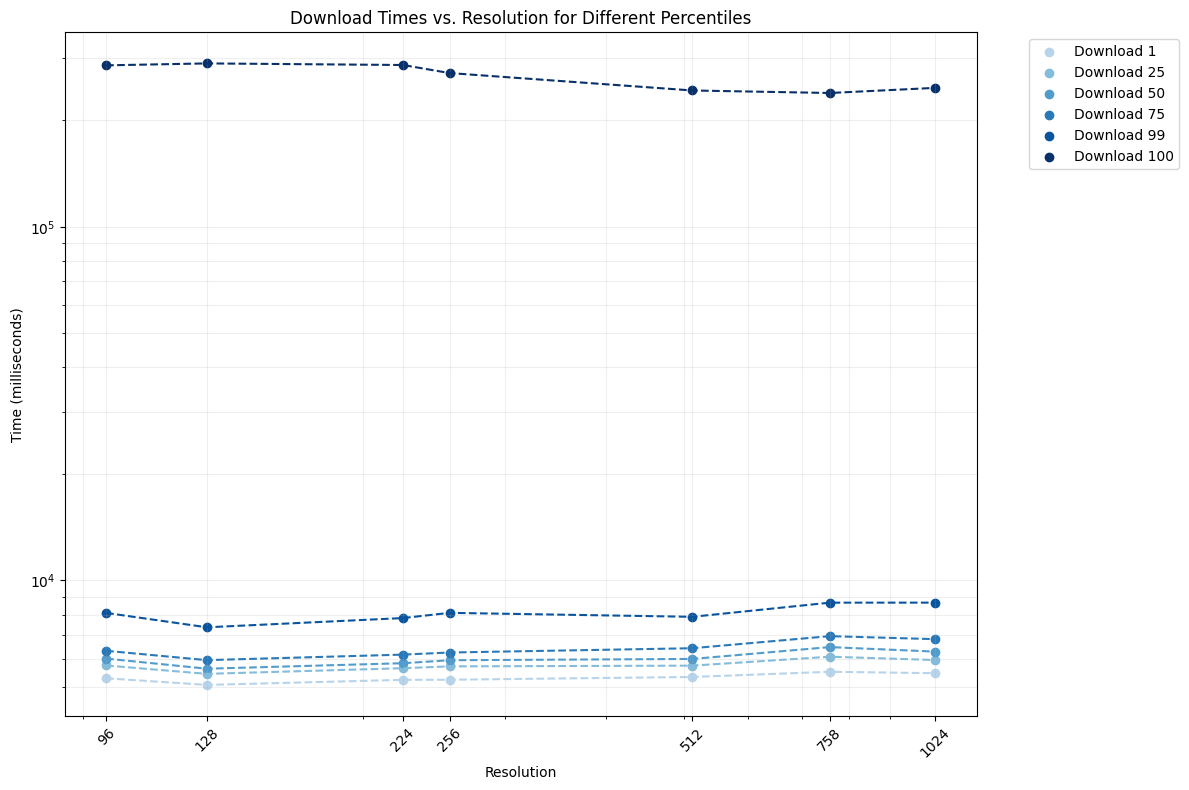

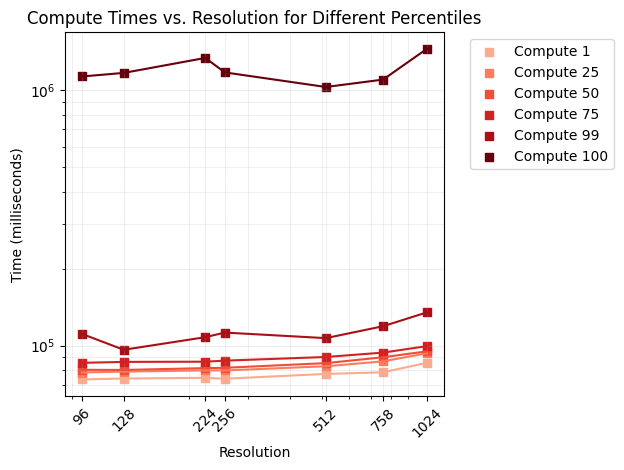

In [36]:
percentiles = [1, 25, 50, 75, 99, 100]

compute_data = {p: [] for p in percentiles}
download_data = {p: [] for p in percentiles}

with open("resolutions.txt", "w") as outf:
    for resolution in resolutions:
        for percentile in percentiles:
            compute = np.percentile(data[resolution]['compute'], percentile)
            download = np.percentile(data[resolution]['download'], percentile)
            compute_data[percentile].append(compute)
            download_data[percentile].append(download)
            outf.write(f"{resolution}x{resolution} p{percentile}_download: {download}\n")
            outf.write(f"{resolution}x{resolution} p{percentile}_compute: {compute}\n")

plt.figure(figsize=(12,8))
# Color maps for download and compute
download_colors = plt.cm.Blues(np.linspace(0.3, 1, len(percentiles)))
compute_colors = plt.cm.Reds(np.linspace(0.3, 1, len(percentiles)))

# Plot download times
for i, (percentile, values) in enumerate(download_data.items()):
    plt.scatter(resolutions, values, label=f'Download {percentile}', 
                color=download_colors[i], marker='o')
    plt.plot(resolutions, values, color=download_colors[i], linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Resolution')
plt.ylabel('Time (milliseconds)')
plt.title('Download Times vs. Resolution for Different Percentiles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(resolutions, resolutions, rotation=45)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig("Download Times vs. Resolution for Different Percentiles.png")
plt.show()

# Plot compute times
for i, (percentile, values) in enumerate(compute_data.items()):
    plt.scatter(resolutions, values, label=f'Compute {percentile}', 
                color=compute_colors[i], marker='s')
    plt.plot(resolutions, values, color=compute_colors[i], linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Resolution')
plt.ylabel('Time (milliseconds)')
plt.title('Compute Times vs. Resolution for Different Percentiles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xticks(resolutions, resolutions, rotation=45)
plt.tight_layout()
plt.savefig("Compute Times vs. Resolution for Different Percentiles.png")
plt.show()

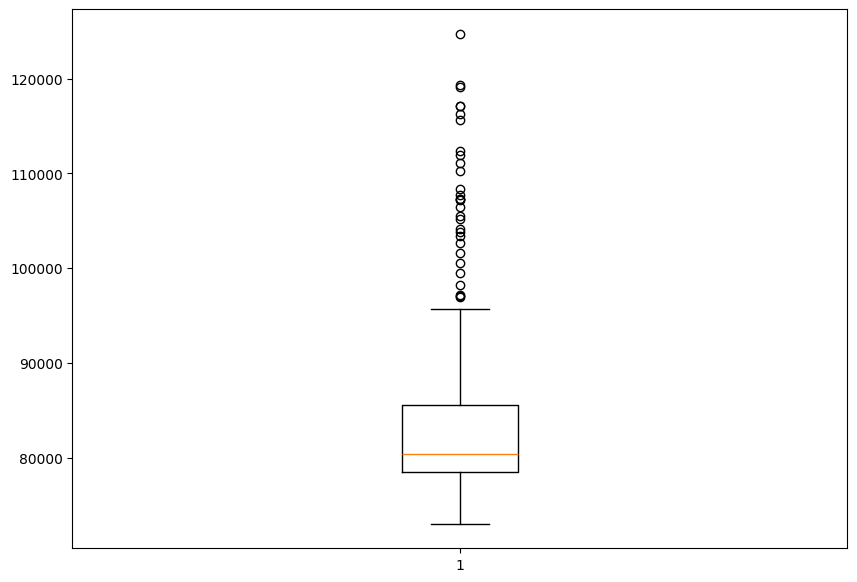

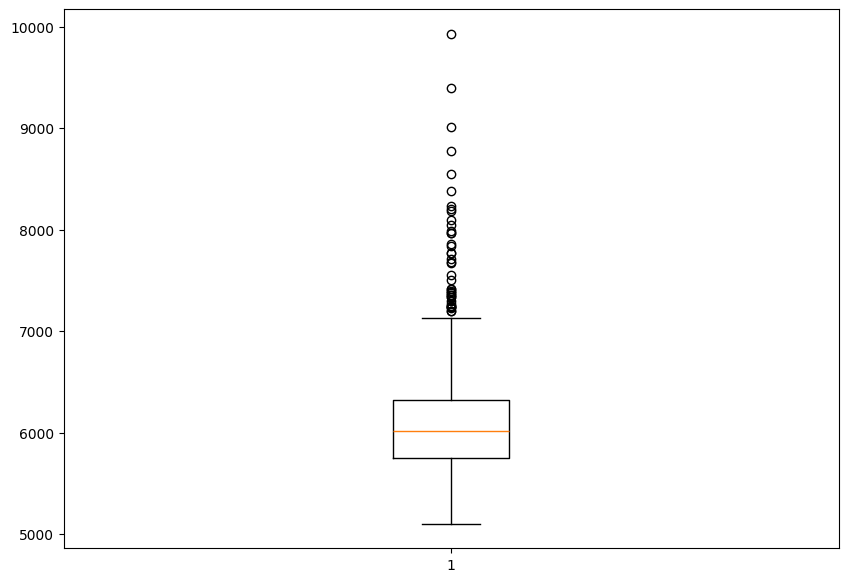

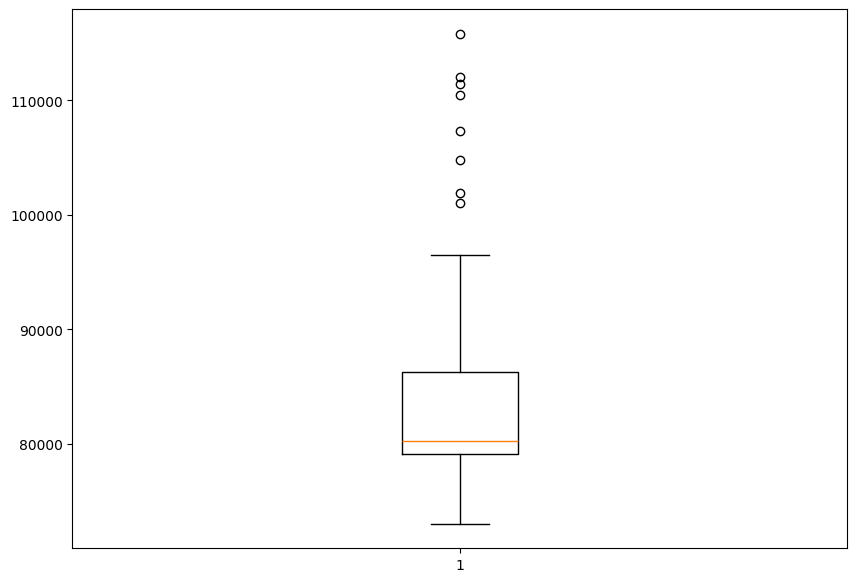

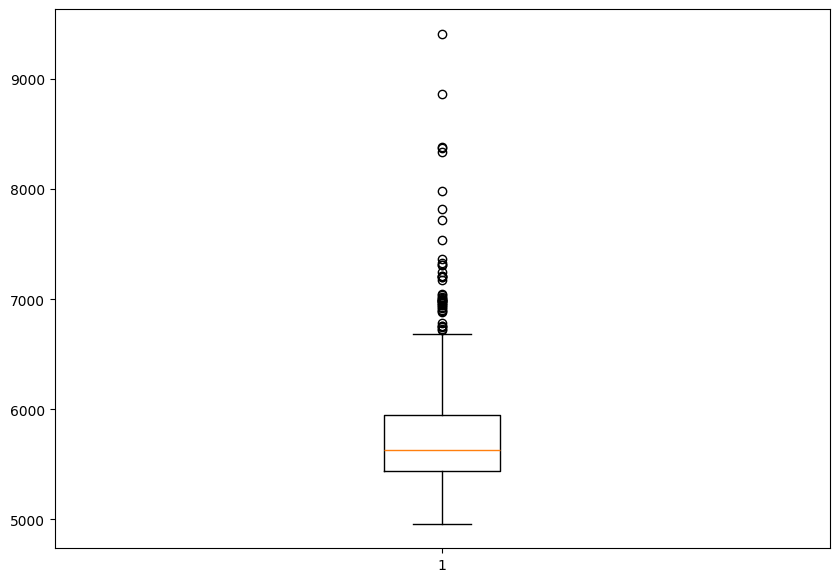

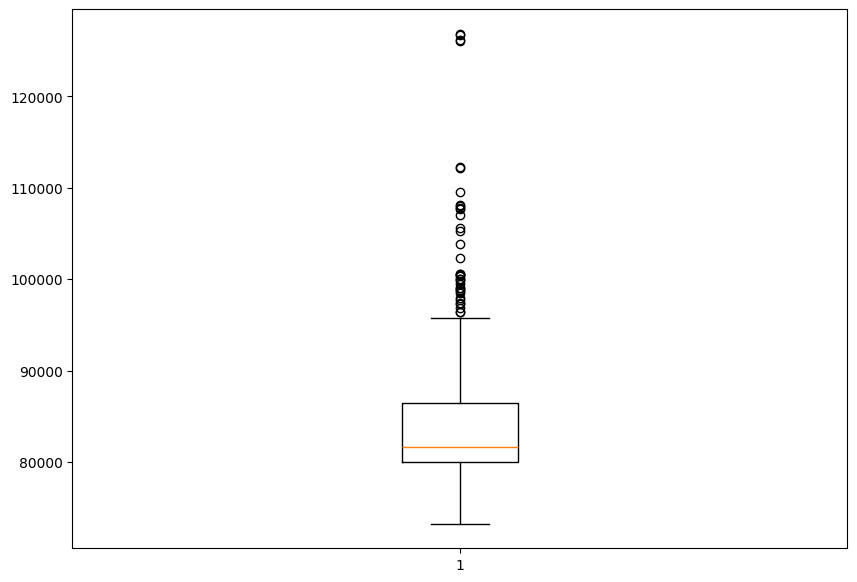

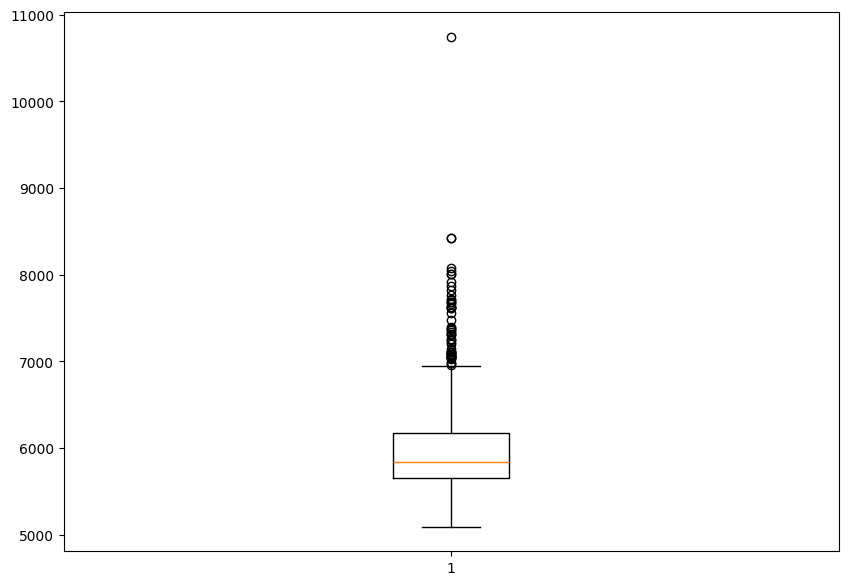

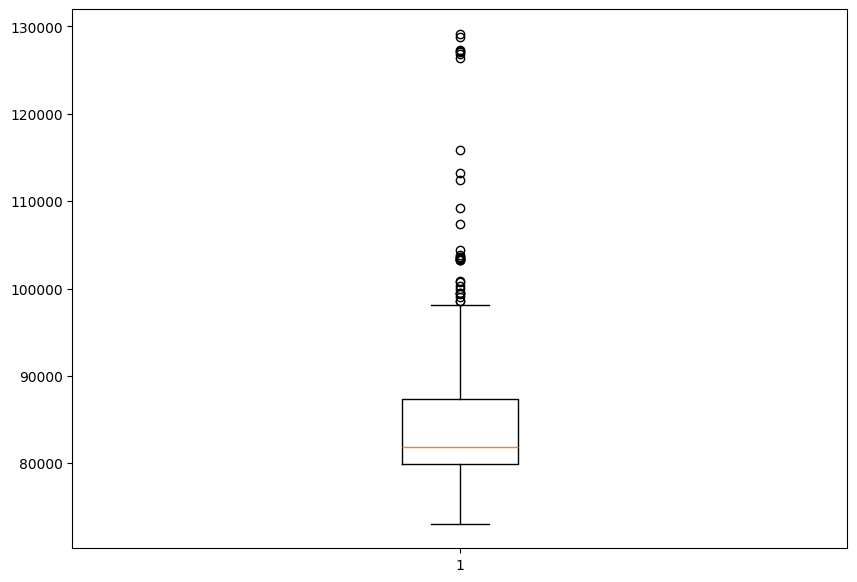

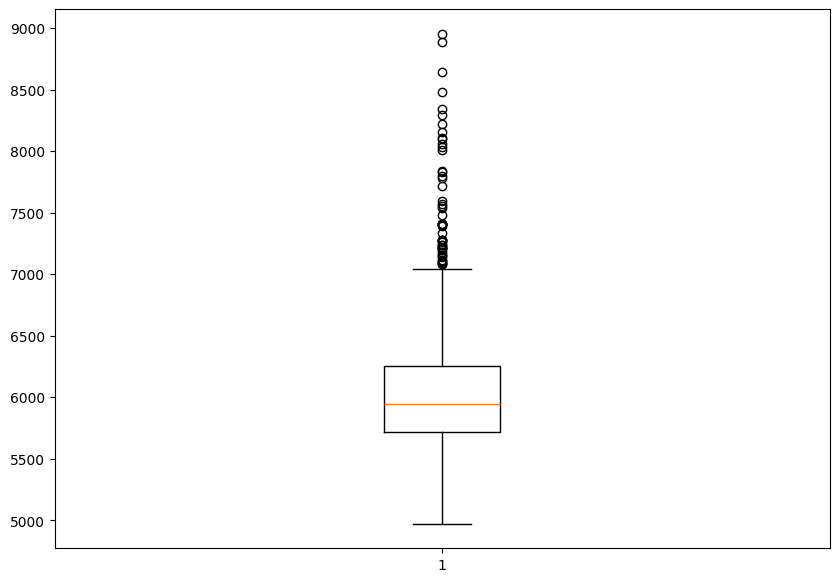

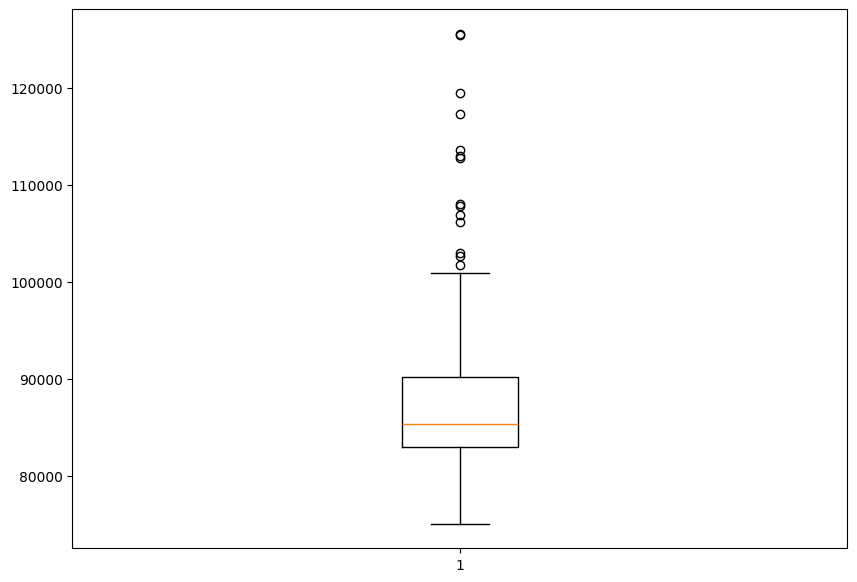

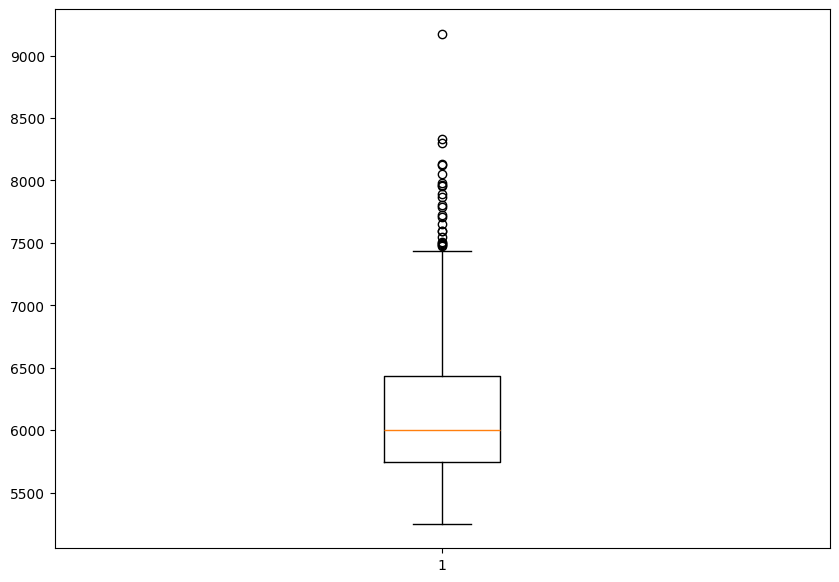

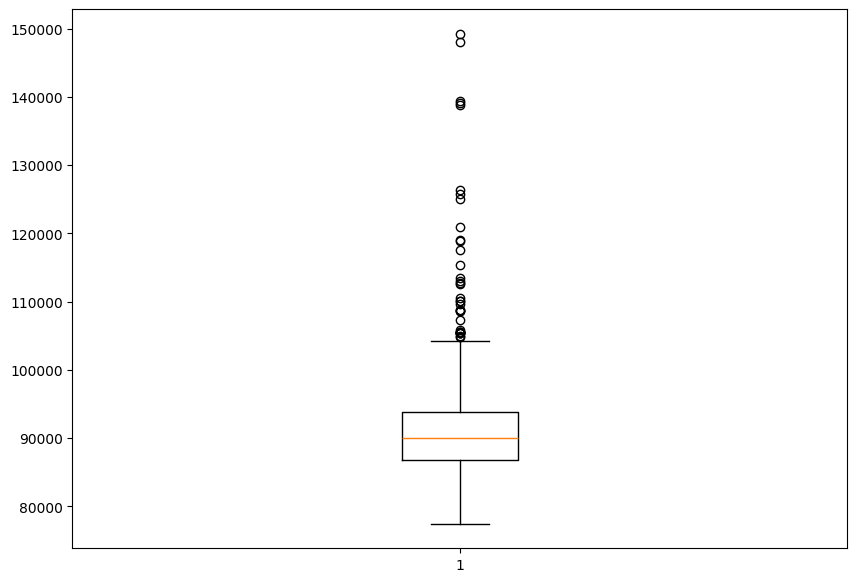

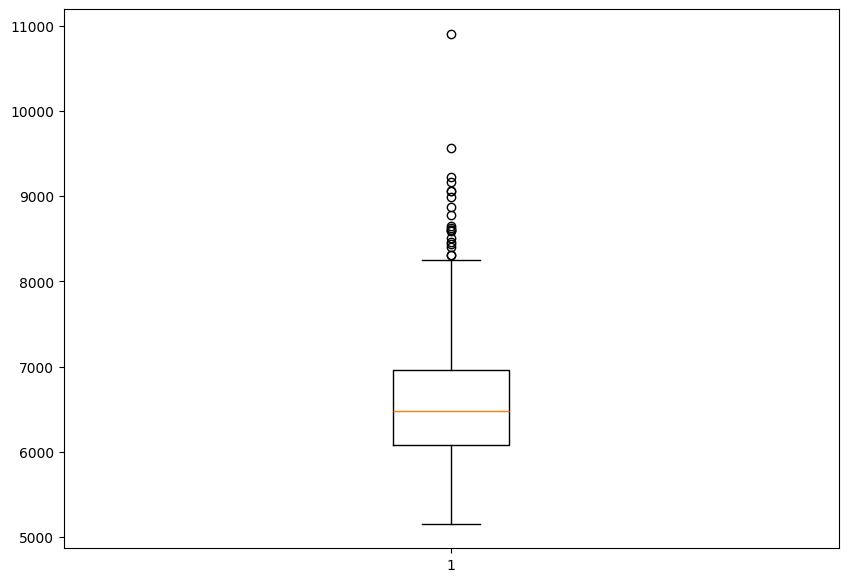

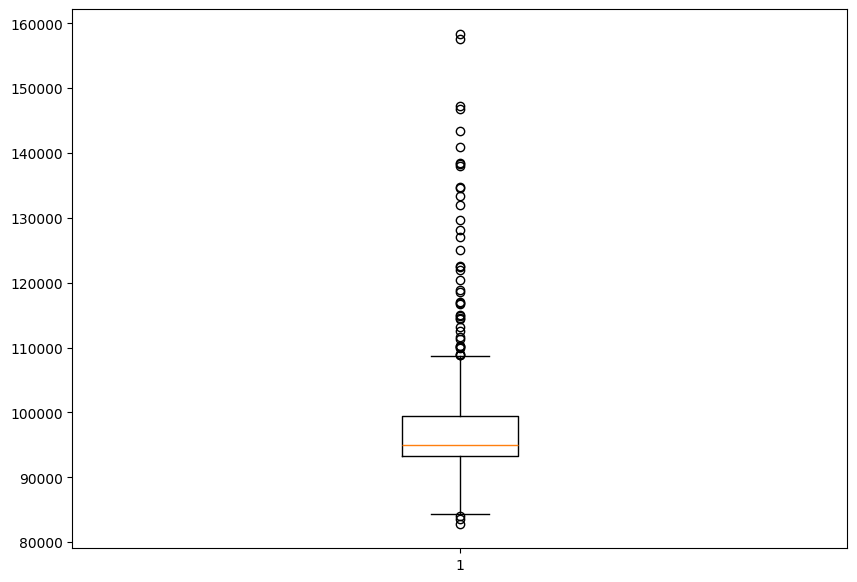

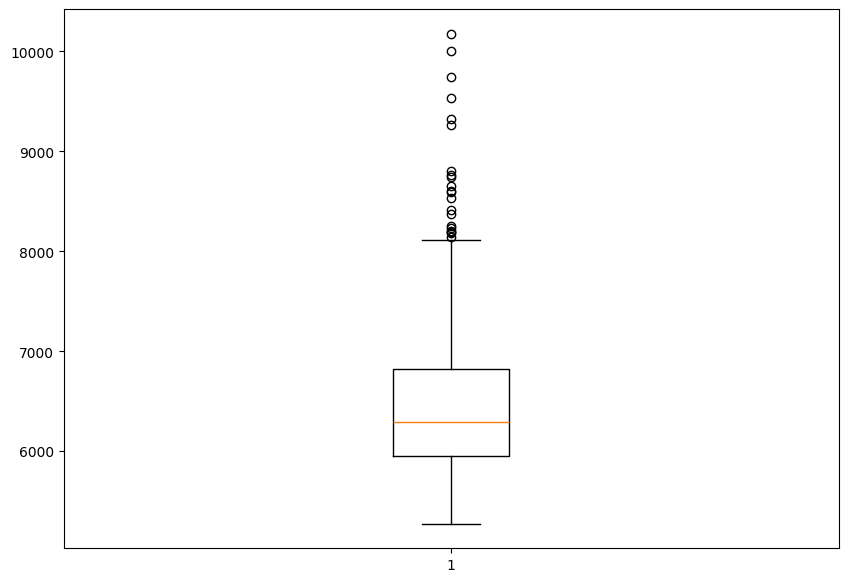

In [26]:
for resolution in resolutions:
    fig = plt.figure(figsize=(10,7))
    plt.boxplot(without_largest_element(data[resolution]["compute"]))
    plt.savefig(f"{resolution}_compute_boxplot.png")
    
    fig = plt.figure(figsize=(10,7))
    plt.boxplot(without_largest_element(data[resolution]["download"]))
    plt.savefig(f"{resolution}_download_boxplot.png")